In [ ]:
!pip install opendatasets

Kaggle API :-

User Name - prateekdilaware
key - 4d88f228b5de483397a2ab5f8ecc8bbe

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prateekdilaware
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:05<00:00, 200MB/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generator - one for training data and one for validation data

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int', # cat -0 , dog -1
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Certainly! The selected code uses the image_dataset_from_directory function from the keras.utils module to create training and validation datasets from the image files in the specified directories.

Here's a breakdown:

keras.utils.image_dataset_from_directory: This function is a convenient way to load image data from a directory structure where subdirectories represent different classes.
directory: This argument specifies the path to the root directory containing the image data. The function will look for subdirectories within this path, treating each subdirectory name as a class label.
labels='inferred': This tells the function to automatically infer the class labels from the subdirectory names.
label_mode='int': This specifies that the labels should be encoded as integers (e.g., 0 for the first class, 1 for the second, and so on). In this case, 'cat' will be 0 and 'dog' will be 1.
batch_size=32: This sets the number of images to include in each batch of data. The model will be trained on these batches.
image_size=(256, 256): This resizes all images to a consistent size of 256x256 pixels. This is important because neural networks typically require fixed-size input.
The code creates two datasets: train_ds from the /content/dogs-vs-cats/train directory and validation_ds from the /content/dogs-vs-cats/test directory. These datasets are then ready to be used for training and validating a deep learning model.

In [ ]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

This code defines a function process that takes an image and its corresponding label as input. Inside the function, it converts the image data to a floating-point type and scales the pixel values from the original range (0-255) to a range between 0 and 1 by dividing by 255. This normalization is a common preprocessing step in image processing for neural networks. The function then returns the normalized image and its label.

After defining the function, the code applies this process function to both the train_ds and validation_ds datasets using the .map() method. This means that for every element (image and label pair) in these datasets, the process function will be applied, effectively normalizing all the images in both the training and validation sets.


why we need to normalize here ?
 Normalization is a crucial step in preparing image data for training deep learning models like the one you're building. Here's why it's important:

Improved Training Stability: Neural networks are sensitive to the scale of input data. If the pixel values are large (0-255), the gradients during training can become very large, leading to unstable training and difficulty in converging to an optimal solution. Normalizing to a smaller range (0-1) helps to keep the gradients in a more manageable range, making the training process more stable.
Faster Convergence: By scaling the input features to a similar range, normalization helps the optimization algorithm (like gradient descent) converge faster. Without normalization, features with larger values might dominate the learning process, while features with smaller values might have less impact, even if they are equally important.
Better Performance: Normalization can lead to better overall model performance. When features are on a similar scale, the model can learn the relationships between them more effectively.
In the case of image data, normalizing the pixel values to a range of 0 to 1 (or sometimes -1 to 1) is a standard practice that helps theneural network learn more efficiently and achieve netter results.

In [ ]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides =2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides =2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides =2,padding='valid'))

#flatten layer
model.add(Flatten())

#Fully Connected layer

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss= "binary_crossentropy",metrics=["accuracy"])

In [ ]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.5944 - loss: 0.7072 - val_accuracy: 0.7602 - val_loss: 0.5220
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 72ms/step - accuracy: 0.7648 - loss: 0.4911 - val_accuracy: 0.7798 - val_loss: 0.4769
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 70ms/step - accuracy: 0.8231 - loss: 0.3898 - val_accuracy: 0.8064 - val_loss: 0.4459
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8819 - loss: 0.2780 - val_accuracy: 0.8032 - val_loss: 0.5836
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.9293 - loss: 0.1740 - val_accuracy: 0.7888 - val_loss: 0.8349
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9618 - loss: 0.1058 - val_accuracy: 0.7872 - val_loss: 0.9489
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9730 - loss: 0.0787 - val_accuracy: 0.7742 - val_loss: 1.1511
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9803 - loss: 0.0584 - 

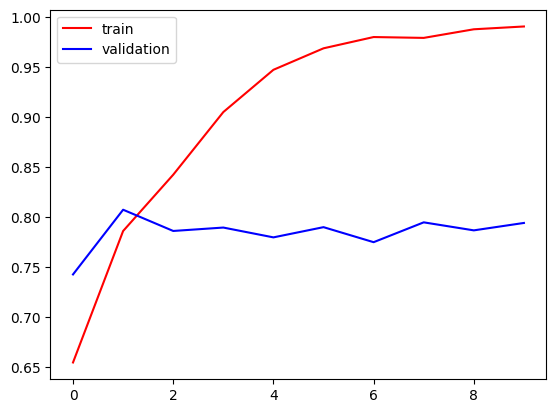

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

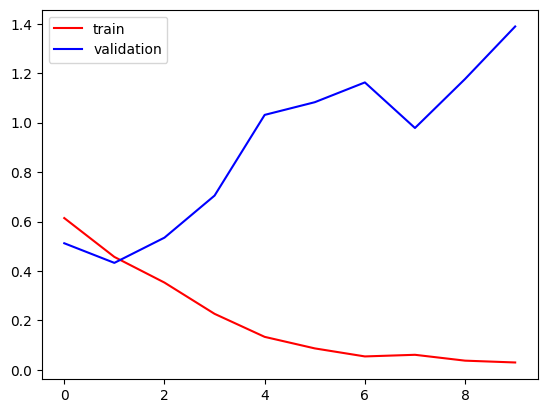

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Means there is overfitting

#Ways to reduce overfitting

# Data Augmentation
# L1/L2 regualrizer
# Dropout
#Batch Norm
# reduce Model Complexity


In [ ]:
# We are using dropout and batch Norm

In [ ]:
# Improving the CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) # 32 filters
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),strides =2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),strides =2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),strides =2,padding='valid'))

#flatten layer
model.add(Flatten())

#Fully Connected layer

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer="adam",loss= "binary_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6245 - loss: 0.6567 - val_accuracy: 0.6658 - val_loss: 0.7182
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7270 - loss: 0.5438 - val_accuracy: 0.7234 - val_loss: 0.5261
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 78ms/step - accuracy: 0.7811 - loss: 0.4604 - val_accuracy: 0.7676 - val_loss: 0.4748
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 83ms/step - accuracy: 0.8145 - loss: 0.4031 - val_accuracy: 0.7226 - val_loss: 0.5962
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.8529 - loss: 0.3428 - val_accuracy: 0.7094 - val_loss: 0.6618
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8928 - loss: 0.2572 - val_accuracy: 0.8044 - val_loss: 0.5244
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9255 - loss: 0.1848 - val_accuracy: 0.8078 - val_loss: 0.5573
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 83ms/step - accuracy: 0.9533 - loss: 0.1208 - 

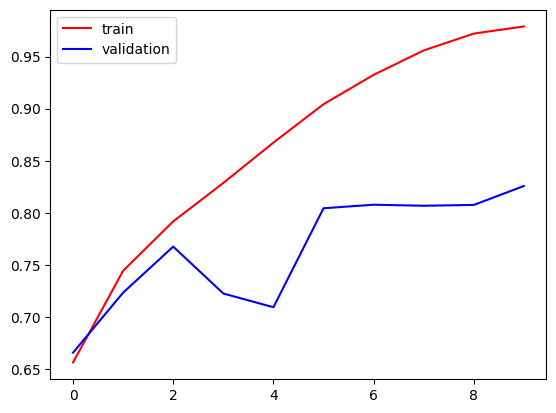

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

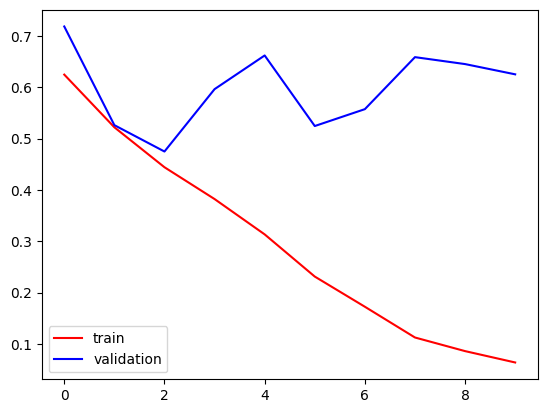

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Prediction

In [ ]:
import cv2

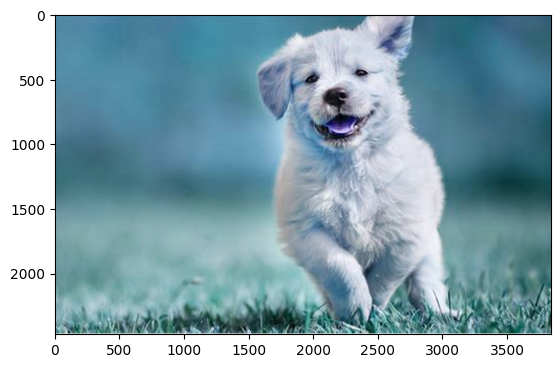

In [ ]:
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)
plt.show()

In [ ]:
test_img.shape

(2470, 3840, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3)) # Means we have only 1 img in our batch of this dimension

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [ ]:
# One means dog